In [1]:
import sys
# Put here the directory containing the folder where the definitions are saved
sys.path.insert(0, r'C:\Users\demdr\UTS\Important files for PhD thesis\Definitions')


In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

from definitions_for_opening_E4_files_and_making_a_df import create_final_dict
from definitions_for_EDA_feature_extraction_and_activity_recognition import resample_EDA_df, create_EDA_features, detect_activity
from definitions_for_activity_recognition import detect_change_of_intensity

Using TensorFlow backend.
c:\users\demdr\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\demdr\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\demdr\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\demdr\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:529

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [3]:
# Put here the directory of the folder where the EDA data is saved 
# This should be the folder with the EDA data, which is downloaded from the Empatica E4 manager
# For downloading the Empatica E4 data from the E4 manager, see here the directions: https://support.empatica.com/hc/en-us/articles/206389995-Download-your-data-from-the-E4-wristband
# This code uses the files 'EDA.csv', 'ACC.csv', 'HR.csv' and 'TEMP.csv' from this folder

# Ideally we should have a separate folder for each user, to store their data
# Otherwise we have to tweak a bit the initial code in the 'definitions_for_opening_E4_files_and_making_a_df' file

# ATTENTION: The path that we specify should correspond to a folder that has another folder (or more), containing the following csv files 
# of the session that we want to analyse: 
# 'EDA.csv', 'ACC.csv', 'HR.csv' and 'TEMP.csv' 
# DO NOT put directly the path of the final folder that contains the csv files 
# Instead, put the path of its parent folder
# For instance, imagine the following directories: 
# ...\Project data\Raw data\Participants: The name of the folder containing all the raw data from all participants
# ...\Project data\Raw data\Participants\A : The path of the folder containing the data of participant A within that folder
# ...\Project data\Raw data\Participants\A\EDA data : The folder where we have all the unzipped EDA data for this participant, from many recording sessions
# ...\Project data\Raw data\Participants\A\EDA data\Session 1 : This is the parent folder that we want. 'Session 1' is just a name for this session. Inside, it has another folder with unzipped EDA data for one session. 
# ...\Project data\Raw data\Participants\A\EDA data\Session 1\1460023847_A00A98 : The name of the unzipped folder with the EDA data for this session
# Inside this folder, there are csv files for EDA, ACC, HR, TEMP, like this:
# ...\Project data\Raw data\Participants\A\EDA data\Session 1\1460023847_A00A98\EDA.csv     ...and so on
# From all these directories, we put the directory '...\Project data\Raw data\Participants\A\EDA data\Session 1' 
# to analyse the data of session 1 for user A

#this_directory = 'XXXXXXXXX' # replace this with the appropriate directory name
#For the example described above, we would put the following directory: 
this_directory = r'C:\Users\demdr\Desktop\Testing the thesis functions\Project data\Raw data\Participants\A\EDA data\Session 1'
#participant_ID = 'YYYYYYYY' # Put here the participant ID; this could be a randomly assigned string or integer or anything else 
# For the example described above, we would do the following:
participant_ID = 'A'

all_data_together = create_final_dict(this_directory)

2019-07-16 13:09:55+10:00
0.04247095584869385


### EDA and activity feature extraction

art
percentage of artifacts: 22 9995 0.0022011005502751376
[   0   80  120  280  320  520  560 1040 1080 1200 1240 1760 2920 3440
 3560 3960 4000 4520 4560 5080 5440 6160 6200 6240 7400 7560 8200 8240
 8280 8320 8360 8480 8560 8720 8760 8920 9040 9080 9160 9400 9440 9480
 9520 9560 9720 9760 9800 9880 9961]


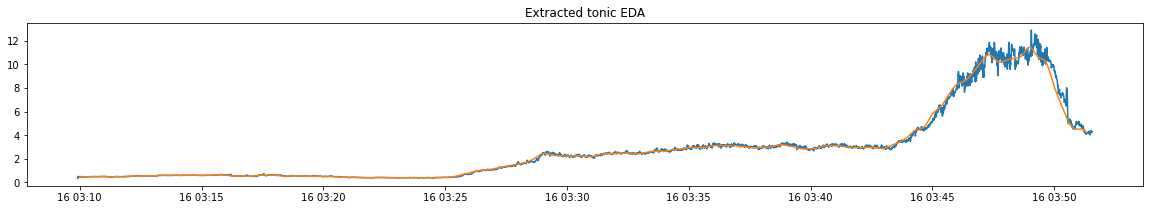

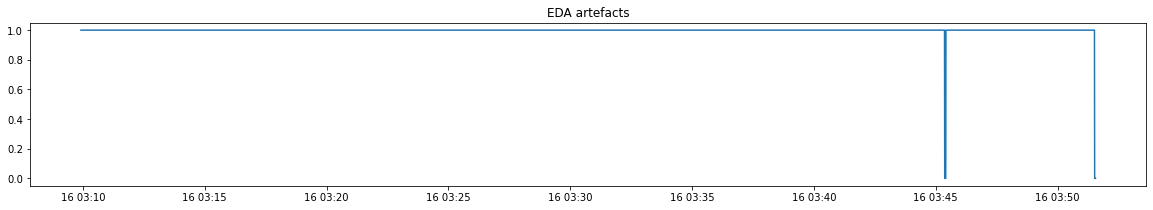

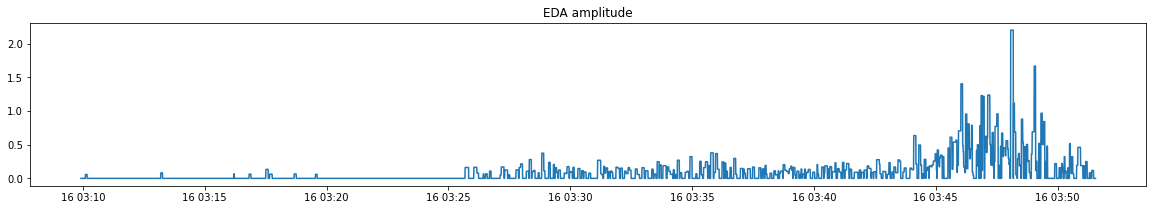

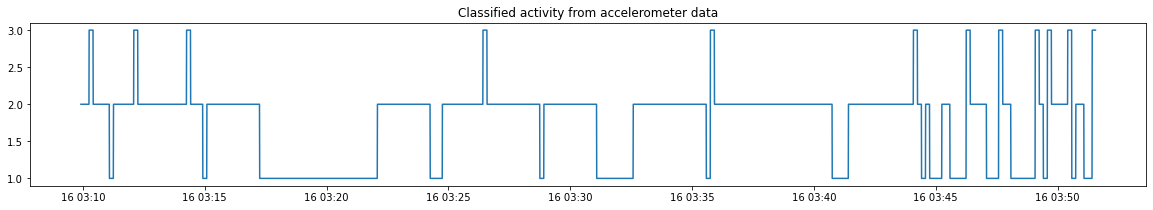

In [4]:
for_final_EDA_df = pd.DataFrame()

for ses in all_data_together['E4_Session'].unique():
    this_df = all_data_together[all_data_together['E4_Session']==ses]

    # The following are the definitions for feature extraction:
    this_df_resampled = resample_EDA_df(this_df)
    this_df_resampled = create_EDA_features(this_df_resampled)
    #activity recognition
    this_df_resampled = detect_activity(this_df_resampled)
    this_df_resampled
    # Plot some of the extracted data if we want
    plt.figure(figsize=(20,3))
    plt.plot(this_df_resampled['EDA'])
    plt.plot(this_df_resampled['EDA_tonic'])
    plt.title('Extracted tonic EDA')
    plt.figure(figsize=(20,3))
    plt.plot(this_df_resampled['EDA artifact'])
    plt.title('EDA artefacts')
    plt.figure(figsize=(20,3))
    plt.plot(this_df_resampled['EDR_amplitude'])
    plt.title('EDA amplitude')
    plt.figure(figsize=(20,3))
    plt.plot(this_df_resampled['activity'])
    plt.title('Classified activity from accelerometer data')

    
    new_df = this_df_resampled.copy()
    new_df['Detected Activity']=new_df['activity'].copy()
    new_df = detect_change_of_intensity(new_df)


    this_df_resampled['Change of activity state'] = new_df['Change of activity state_After prediction']
    this_df_resampled['Steady state'] = new_df['Steady state']
    this_df_resampled['Change of movement intensity'] = new_df['Change of movement intensity_After prediction']
    this_df_resampled['Spontaneous movement'] = new_df['Spontaneous movement_After prediction']
    
    for_final_EDA_df = for_final_EDA_df.append(this_df_resampled)
    

#### visualise the extracted changes in activity

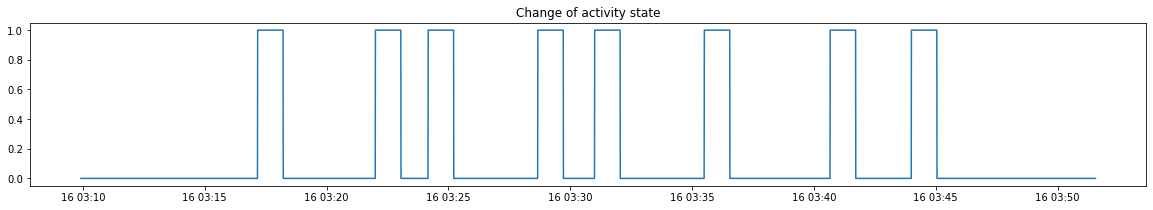

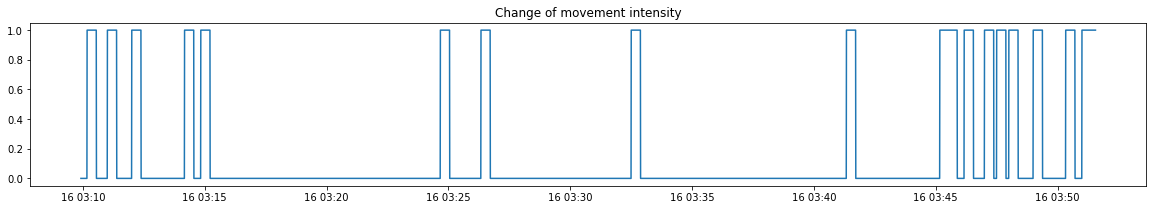

In [5]:

for ses in for_final_EDA_df['E4_Session'].unique():
    this_df = for_final_EDA_df[for_final_EDA_df['E4_Session']==ses]
    plt.figure(figsize=(20,3))
    plt.plot(this_df['Change of activity state'])
    plt.title('Change of activity state')
    plt.figure(figsize=(20,3))
    plt.plot(this_df['Change of movement intensity'])
    plt.title('Change of movement intensity')



#### Construct a df with only selected columns

In [6]:
for_final_EDA_df['HR_from e4']=for_final_EDA_df['HR'].copy()
for_final_EDA_df['Participant_ID']=participant_ID


final_EDA_df = pd.concat([for_final_EDA_df['EDA'],
for_final_EDA_df['ACC_1'],
for_final_EDA_df['ACC_2'],
for_final_EDA_df['ACC_3'],
for_final_EDA_df['HR_from e4'],
for_final_EDA_df['EDA_session'],
for_final_EDA_df['EDA artifact'],
for_final_EDA_df['EDA artifact'],
for_final_EDA_df['Stress'],
for_final_EDA_df['TEMP_smoothed'],
for_final_EDA_df['EDA_tonic'],
for_final_EDA_df['EDR_amplitude'],
for_final_EDA_df['EDA_duration'],
for_final_EDA_df['EDA_duration'],
for_final_EDA_df['percentage_of_EDA_artifacts'],
for_final_EDA_df['activity'],
for_final_EDA_df['activity_2s'],
for_final_EDA_df['Change of activity state'],
for_final_EDA_df['Steady state'],
for_final_EDA_df['Change of movement intensity'],
for_final_EDA_df['Spontaneous movement']],axis=1)





final_EDA_df = final_EDA_df.fillna(method='bfill')
final_EDA_df = final_EDA_df.fillna(method='ffill')


### Save here the extracted data

In [7]:
# Put here the directory for saving the constructed file 
#path_to_save = r'ZZZZZZZZ.csv' 
# This file contains the processed EDA and activity data,with timestamps

# For the example described above, we would use the following file for saving the csv: 
path_to_save = r'C:\Users\demdr\Desktop\Testing the thesis functions\Project data\Analysed data\Participants\ID\E4 data\Session 1.csv'
path_to_save = path_to_save.replace('ID',participant_ID)
print(path_to_save)



final_EDA_df.to_csv(path_to_save)

C:\Users\demdr\Desktop\Testing the thesis functions\Project data\Analysed data\Participants\A\E4 data\Session 1.csv
